In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('/content/sample_data/wine.csv')
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (178, 14)
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [3]:
# EDA
print("\nBasic info:")
print(df.describe())
print("\nClass distribution:")
print(df['Type'].value_counts())


Basic info:
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998

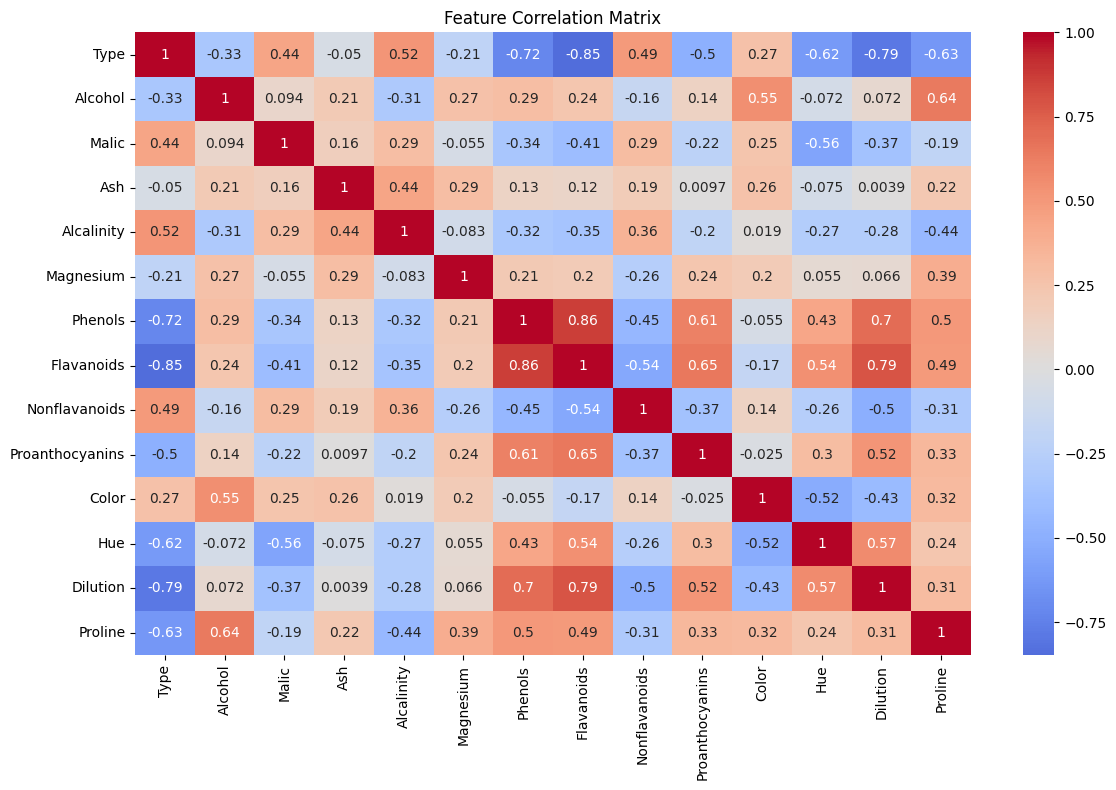

In [4]:
# Check correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [5]:
# Standardize features (exclude Type)
X = df.drop('Type', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Text(0.5, 1.0, 'Scree Plot')

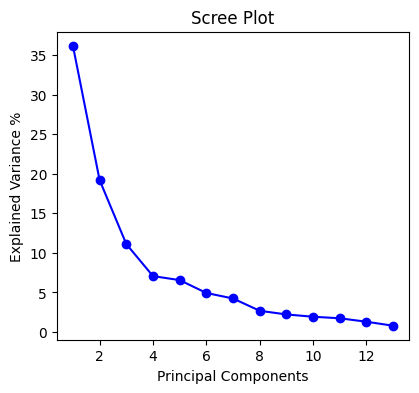

In [7]:
# Scree plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,14), pca.explained_variance_ratio_ * 100, 'bo-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance %')
plt.title('Scree Plot')

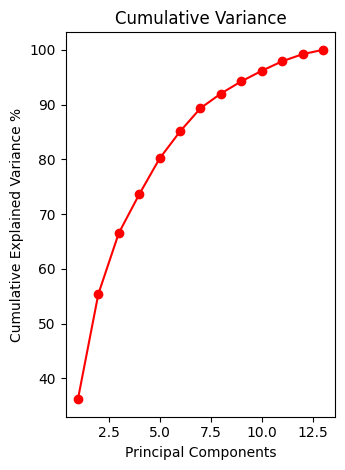

In [8]:
plt.subplot(1,2,2)
plt.plot(range(1,14), np.cumsum(pca.explained_variance_ratio_) * 100, 'ro-')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance %')
plt.title('Cumulative Variance')
plt.tight_layout()
plt.show()

In [9]:
print("Explained variance ratio:", pca.explained_variance_ratio_[:5])

Explained variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]


In [10]:
# Use 3 components (covers most variance)
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

In [11]:
# Clustering on original data (use first 3 features for 2D viz)
kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_orig = kmeans_orig.fit_predict(X_scaled)
sil_orig = silhouette_score(X_scaled, clusters_orig)
print(f"Original data silhouette score: {sil_orig:.3f}")

Original data silhouette score: 0.285


Text(0, 0.5, 'PC2')

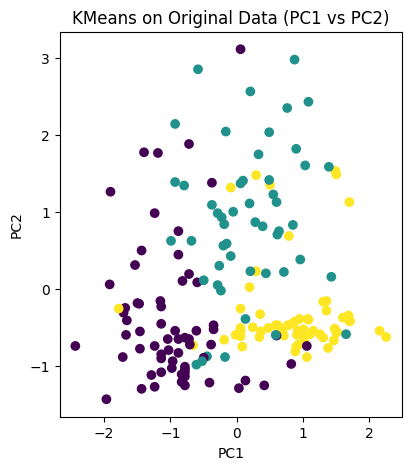

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters_orig, cmap='viridis')
plt.title('KMeans on Original Data (PC1 vs PC2)')
plt.xlabel('PC1'); plt.ylabel('PC2')

In [13]:
# Clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca_3)
sil_pca = silhouette_score(X_pca_3, clusters_pca)
print(f"PCA data silhouette score: {sil_pca:.3f}")

PCA data silhouette score: 0.453


Text(0, 0.5, 'PC2')

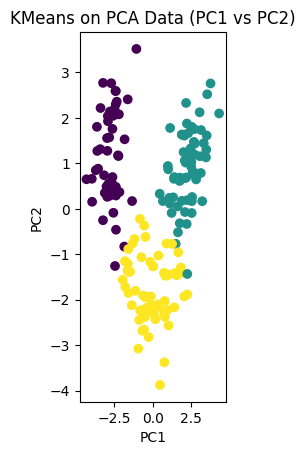

In [14]:
plt.subplot(1,3,2)
plt.scatter(X_pca_3[:,0], X_pca_3[:,1], c=clusters_pca, cmap='viridis')
plt.title('KMeans on PCA Data (PC1 vs PC2)')
plt.xlabel('PC1'); plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

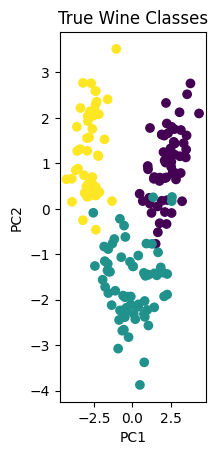

In [15]:
# True labels vs clusters
plt.subplot(1,3,3)
plt.scatter(X_pca_3[:,0], X_pca_3[:,1], c=df['Type'], cmap='viridis')
plt.title('True Wine Classes')
plt.xlabel('PC1'); plt.ylabel('PC2')

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
# Compare cluster assignmentswith true labels
print("\nContingency table - Original clusters vs True:")
print(pd.crosstab(clusters_orig, df['Type']))


Contingency table - Original clusters vs True:
Type    1   2   3
row_0            
0       0  65   0
1       0   3  48
2      59   3   0


In [18]:
print("\nContingency table - PCA clusters vs True:")
print(pd.crosstab(clusters_pca, df['Type']))


Contingency table - PCA clusters vs True:
Type    1   2   3
row_0            
0       0   3  48
1      59   4   0
2       0  64   0


In [19]:
print(f"\nSummary:")
print(f"Original silhouette: {sil_orig:.3f}")
print(f"PCA silhouette: {sil_pca:.3f}")
print(f"PCA explains {np.sum(pca_3.explained_variance_ratio_)*100:.1f}% variance with 3 components")


Summary:
Original silhouette: 0.285
PCA silhouette: 0.453
PCA explains 66.5% variance with 3 components
